In [35]:
import os   #linar regression for binary classes
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_digits
import xgboost as xgb

In [2]:
inpDir = os.path.join( '..', 'input')


###moduleDir = 'MACHINE LEARNING'

outDir = os.path.join('output')


# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.1
N_SAMPLES = 1000
ALPHA = 0.001

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 150,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 2,
          'legend.numpoints' : 1
         }
CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE=0.2

<Figure size 1500x600 with 0 Axes>

In [3]:
digits = load_digits()

print(digits.keys())

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                   stratify = digits.target,
                                                   random_state = RANDOM_STATE)
X_train.shape

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


(1347, 64)

In [4]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

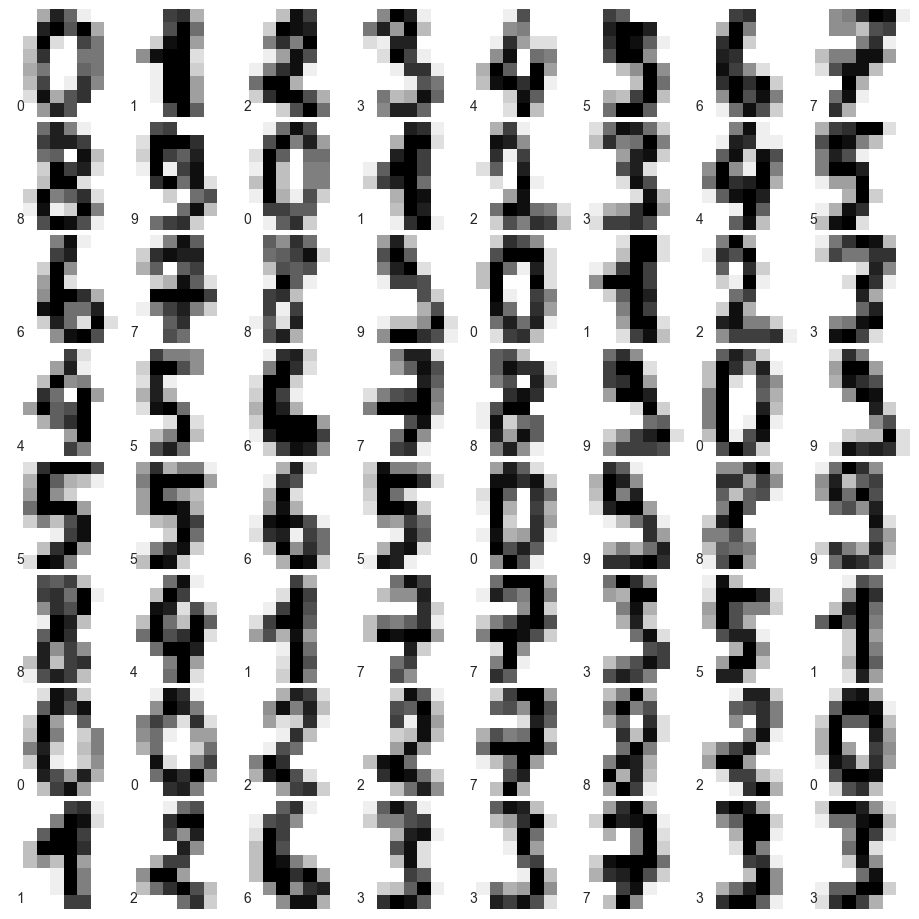

In [12]:
fig = plt.figure(figsize = (9,9))

fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

# Plot the digits: each image in 8x8 pixels
for i in range(64):
    
    ax = fig.add_subplot(8,8, i + 1, xticks = [], yticks = [])
    
    ax.imshow(digits.images[i], cmap = plt.cm.binary, interpolation = 'nearest')
    
    # label the imag with the target
    
    ax.text(0,7, str(digits.target[i]))

RF: max_depth =   3 | F1 Score:  0.8746
RF: max_depth =   5 | F1 Score:  0.9482
RF: max_depth =  10 | F1 Score:  0.9708


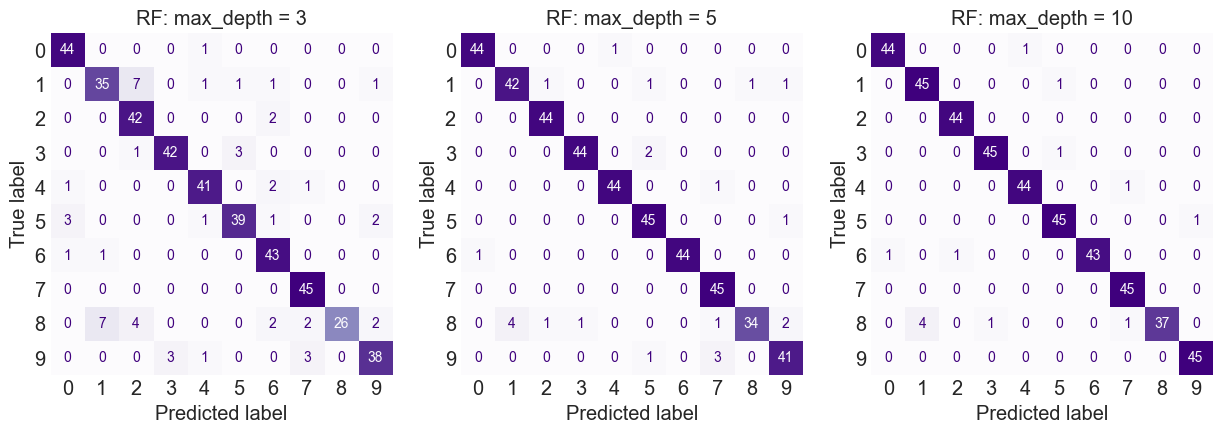

In [20]:
# Random forest results
fig, axes = plt.subplots(1,3, figsize = (15,8))

for i, max_depth in enumerate([3, 5, 10]):
    
    clf = RandomForestClassifier(max_depth = max_depth).fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print("RF: max_depth = {:3d}".format(max_depth), end = ' | ')
    
    print("F1 Score: {: .4f}".format(f1_score(y_test, y_pred, average = 'weighted')))
    
    cm = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                 display_labels = digits.target_names)
    
    disp.plot(ax = axes[i], cmap = plt.cm.Purples, colorbar = False);
    
    axes[i].set_title("RF: max_depth = {0}".format(max_depth))
    
    axes[i].grid()

RF: max_depth =  10 | F1 Score:  0.9731
RF: max_depth =  15 | F1 Score:  0.9779
RF: max_depth =  20 | F1 Score:  0.9775


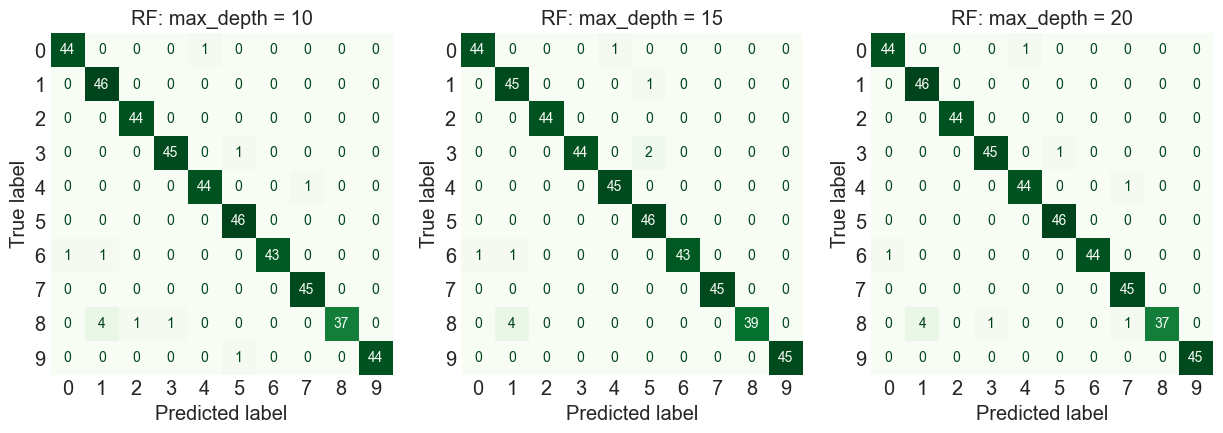

In [22]:
# Random forest results
fig, axes = plt.subplots(1,3, figsize = (15,8))

for i, max_depth in enumerate([10,15,20]):
    
    clf = RandomForestClassifier(max_depth = max_depth).fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print("RF: max_depth = {:3d}".format(max_depth), end = ' | ')
    
    print("F1 Score: {: .4f}".format(f1_score(y_test, y_pred, average = 'weighted')))
    
    cm = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                 display_labels = digits.target_names)
    
    disp.plot(ax = axes[i], cmap = plt.cm.Greens, colorbar = False);
    
    axes[i].set_title("RF: max_depth = {0}".format(max_depth))
    
    axes[i].grid()

In [24]:
params = {
    'n_estimators': [100, 200, 500],     # number of trees
    'max_depth': [None, 10, 25, 50],     # The maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1,2],           # The minimum number of samples required to be at a leaf node.
    'max_features': ['sqrt', 'log2', None]
}

rf_clf = RandomForestClassifier()

clf = RandomizedSearchCV(estimator=rf_clf,
                        param_distributions = params,
                        scoring = 'accuracy',
                        n_iter = 25,
                        verbose = 1)
clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

print("Best Accuracy:", clf.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best Accuracy: 0.9732782596723117


In [25]:
params = {
    'n_estimators': [100, 200, 500,600,700,800],     # number of trees
    'max_depth': [None, 10, 25, 50],     # The maximum depth of the tree
    'min_samples_split': [2, 5],     # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1,2],           # The minimum number of samples required to be at a leaf node.
    'max_features': ['sqrt', 'log2', None]
}

rf_clf = RandomForestClassifier()

clf = RandomizedSearchCV(estimator=rf_clf,
                        param_distributions = params,
                        scoring = 'accuracy',
                        n_iter = 25,
                        verbose = 1)
clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

print("Best Accuracy:", clf.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50}
Best Accuracy: 0.9732755059892607


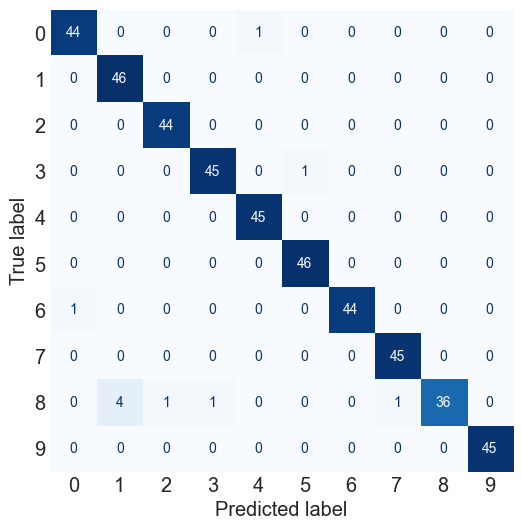

In [34]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = digits.target_names)

disp.plot(cmap = plt.cm.Blues, colorbar = False);

plt.grid()

### XGBoost

In [ ]:
clf = xgb.XGB